#데이터 불러오기 - github f5 데이터

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV,  cross_val_score
from sklearn import preprocessing 
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error
from sklearn.linear_model import Ridge, Lasso, LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn import tree
from lightgbm import LGBMRegressor
from sklearn import linear_model as lm
import xgboost as xgb

In [3]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from lightgbm import plot_importance
from sklearn.metrics import mean_squared_log_error


def train_predict(data):
  ## train, test split
  X=data.drop(['target'],axis=1)
  y=data['target']
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=121)

  ## LGBMRegressor train
  lgbm=lgb.LGBMRegressor(bagging_freq=5, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.2, max_depth=-1,
              min_child_samples=91, min_child_weight=0.001, min_split_gain=0.2,
              n_estimators=240, n_jobs=-1, num_leaves=50, objective=None,
              random_state=42, reg_alpha=0.2, reg_lambda=0.01, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0).fit(X_train,y_train)
  
  print("Train Score | {}".format(lgbm.score(X_train,y_train)))

  ## Prediction
  predict=lgbm.predict(X_test)
  print("RMSE | {}".format(np.sqrt(mean_squared_error(predict,y_test))))
  print("RMSLE | {}".format(rmsle(predict,y_test)))
  print("R2 score | {}".format(r2_score(y_test,predict)))

  ## Plot importance
  plot_importance(lgbm,figsize=(10,9))

  return lgbm, predict

In [4]:
from sklearn.metrics import mean_squared_log_error
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
f5 = pd.read_csv('/content/drive/MyDrive/딥인치즈/Data/f5.csv')
f5.head()

,month,day,season,time,rainfall,dust,dong,wind,humidity,snow,...,weekday,heat,station_num,station_name,station_place,place,latitude,longitude,installation_date,target
0,1,1,winter,0,0.0,23.0,가락동,1.9,41.0,0.0,...,5.0,-4.76,4453,위례중앙푸르지오 201동 앞,위례중앙푸르지오 201동 앞,위례광장로 290,37.474346,127.143265,2020-12-30,1
1,1,1,winter,0,0.0,23.0,거여동,1.9,41.0,0.0,...,5.0,-4.76,1227,거여역 8번출구 뒤,거여역 8번출구 뒤,서울특별시 송파구 오금로 지하 499,37.493126,127.143822,2017-06-27,1
2,1,1,winter,0,0.0,23.0,거여동,1.9,41.0,0.0,...,5.0,-4.76,4895,위례포레샤인15단지 상가,위례포레샤인15단지 상가,송파구 거여동 604,37.486416,127.142059,2021-11-10,1
3,1,1,winter,0,0.0,23.0,마천동,1.9,41.0,0.0,...,5.0,-4.76,2642,마천동 성내천 쉼터,마천동 성내천 쉼터,성내천로 179,37.501495,127.147781,2020-01-15,1
4,1,1,winter,0,0.0,23.0,문정동,1.9,41.0,0.0,...,5.0,-4.76,1244,문정 법조단지8,문정 법조단지8,서울특별시 송파구 법원로 101,37.481537,127.122124,2017-06-27,1


# 방이동 (Highest station 2620)

In [7]:
bangi = f5[f5['dong']=='방이동']
bangi.head()

,month,day,season,time,rainfall,dust,dong,wind,humidity,snow,...,weekday,heat,station_num,station_name,station_place,place,latitude,longitude,installation_date,target
7,1,1,winter,0,0.0,23.0,방이동,1.9,41.0,0.0,...,5.0,-4.76,2620,송파나루역 4번 출구옆,송파나루역 4번 출구옆,송파구 송파동 3-15,37.509979,127.112312,2018-11-14,2
8,1,1,winter,0,0.0,23.0,방이동,1.9,41.0,0.0,...,5.0,-4.76,2630,서울방이동 고분군,서울방이동 고분군,방이동 17,37.507866,127.116989,2020-01-21,1
9,1,1,winter,0,0.0,23.0,방이동,1.9,41.0,0.0,...,5.0,-4.76,4870,몽촌토성역 3번 출구,몽촌토성역 3번 출구,송파구 방이동 40-6,37.517078,127.112328,2021-07-13,2
39,1,1,winter,1,0.0,25.0,방이동,1.8,42.0,0.0,...,5.0,-4.76,2620,송파나루역 4번 출구옆,송파나루역 4번 출구옆,송파구 송파동 3-15,37.509979,127.112312,2018-11-14,1
40,1,1,winter,1,0.0,25.0,방이동,1.8,42.0,0.0,...,5.0,-4.76,4464,올림픽공원 북2문,올림픽공원 북2문,방이동88-16,37.523575,127.128044,2020-12-23,2


In [8]:
bangi.drop(['station_name', 'place', 'station_place', 'latitude', 'longitude','installation_date','dong'], axis = 1, inplace = True)

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
import pandas as pd
A=bangi[['season']]
for i in A:
  bangi[i]=encoder.fit_transform(bangi[i])

In [10]:
bangi['station_num'].value_counts()

2620    7071
2622    6210
1248    6084
1218    5901
2621    5851
2630    5638
1278    5614
1268    5540
1215    5539
2653    5334
4481    5213
1260    5187
4865    5185
4464    4362
1267    4117
4870    3975
1300    3782
1299    3760
2654    3573
4856    3295
4857    2656
4461    2023
1291    1902
2609     980
4892     535
4888     253
Name: station_num, dtype: int64

In [11]:
bang1 = bangi[bangi['station_num']==2620].drop(['station_num'],axis = 1)
bang1

,month,day,season,time,rainfall,dust,wind,humidity,snow,temp,holiday,weekday,heat,target
7,1,1,3,0,0.0,23.0,1.9,41.0,0.0,-8.5,1,5.0,-4.76,2
39,1,1,3,1,0.0,25.0,1.8,42.0,0.0,-9.2,1,5.0,-4.76,1
62,1,1,3,2,0.0,25.0,1.2,43.0,0.0,-9.5,1,5.0,-4.76,2
129,1,1,3,6,0.0,27.0,1.9,53.0,0.0,-9.8,1,5.0,-4.76,1
171,1,1,3,7,0.0,25.0,1.9,55.0,0.0,-10.1,1,5.0,-4.76,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810384,12,31,3,16,0.0,24.0,3.3,27.0,0.0,-4.0,0,4.0,-6.48,3
810506,12,31,3,17,0.0,23.0,2.4,28.0,0.0,-5.0,0,4.0,-6.48,1
810621,12,31,3,18,0.0,24.0,2.2,32.0,0.0,-5.9,0,4.0,-6.48,6
810726,12,31,3,19,0.0,22.0,2.2,34.0,0.0,-6.4,0,4.0,-6.48,3


## Vanilla

Train Score | 0.8651253874729139
RMSE | 2.34374879892983
RMSLE | 0.4077900402921664
R2 score | 0.5608365265763802


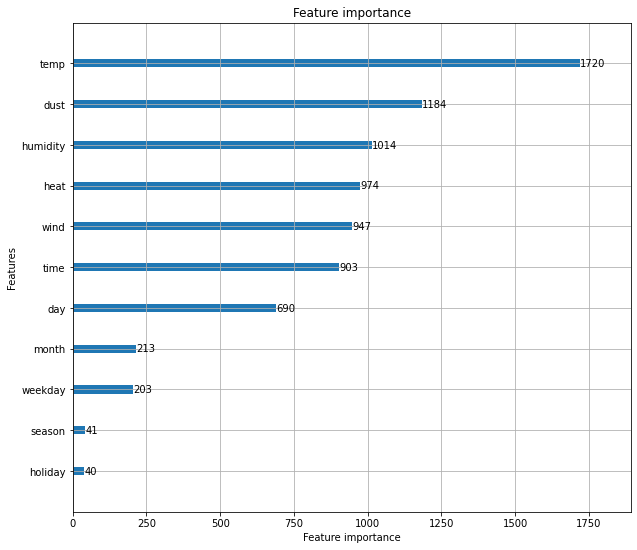

In [12]:
lgbm_bang1, predict1 =train_predict(bang1)

## Scaling

In [13]:
numerical=['rainfall','dust','wind','humidity','snow','temp','heat',]
categorical=['month','day','time','season','holiday','station_num','weekday']

In [14]:
## Scaling
from sklearn.preprocessing import StandardScaler

bangi_normalized=bangi.copy()
scaler=StandardScaler()
bangi_normalized[numerical]=scaler.fit_transform(bangi_normalized[numerical])

In [15]:
bangi_normalized

,month,day,season,time,rainfall,dust,wind,humidity,snow,temp,holiday,weekday,heat,station_num,target
7,1,1,3,0,-0.064305,-0.503561,-0.440241,-1.189104,-0.078714,-2.206588,1,5.0,-1.781769,2620,2
8,1,1,3,0,-0.064305,-0.503561,-0.440241,-1.189104,-0.078714,-2.206588,1,5.0,-1.781769,2630,1
9,1,1,3,0,-0.064305,-0.503561,-0.440241,-1.189104,-0.078714,-2.206588,1,5.0,-1.781769,4870,2
39,1,1,3,1,-0.064305,-0.450350,-0.531777,-1.132034,-0.078714,-2.272111,1,5.0,-1.781769,2620,1
40,1,1,3,1,-0.064305,-0.450350,-0.531777,-1.132034,-0.078714,-2.272111,1,5.0,-1.781769,4464,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810953,12,31,3,22,-0.064305,-0.423745,0.566659,-1.417386,-0.078714,-2.112983,0,4.0,-1.940097,2654,1
810954,12,31,3,22,-0.064305,-0.423745,0.566659,-1.417386,-0.078714,-2.112983,0,4.0,-1.940097,1267,1
810955,12,31,3,22,-0.064305,-0.423745,0.566659,-1.417386,-0.078714,-2.112983,0,4.0,-1.940097,4865,1
810956,12,31,3,22,-0.064305,-0.423745,0.566659,-1.417386,-0.078714,-2.112983,0,4.0,-1.940097,4870,2


In [16]:
bang1_normalized = bangi_normalized[bangi_normalized['station_num']==2620].drop(['station_num'],axis = 1)
bang1_normalized.head()

,month,day,season,time,rainfall,dust,wind,humidity,snow,temp,holiday,weekday,heat,target
7,1,1,3,0,-0.064305,-0.503561,-0.440241,-1.189104,-0.078714,-2.206588,1,5.0,-1.781769,2
39,1,1,3,1,-0.064305,-0.450350,-0.531777,-1.132034,-0.078714,-2.272111,1,5.0,-1.781769,1
62,1,1,3,2,-0.064305,-0.450350,-1.080995,-1.074963,-0.078714,-2.300192,1,5.0,-1.781769,2
129,1,1,3,6,-0.064305,-0.397140,-0.440241,-0.504259,-0.078714,-2.328274,1,5.0,-1.781769,1
171,1,1,3,7,-0.064305,-0.450350,-0.440241,-0.390119,-0.078714,-2.356355,1,5.0,-1.781769,2


Train Score | 0.8673851153566948
RMSE | 2.316124543221556
RMSLE | 0.3971935679003981
R2 score | 0.5711277921179019


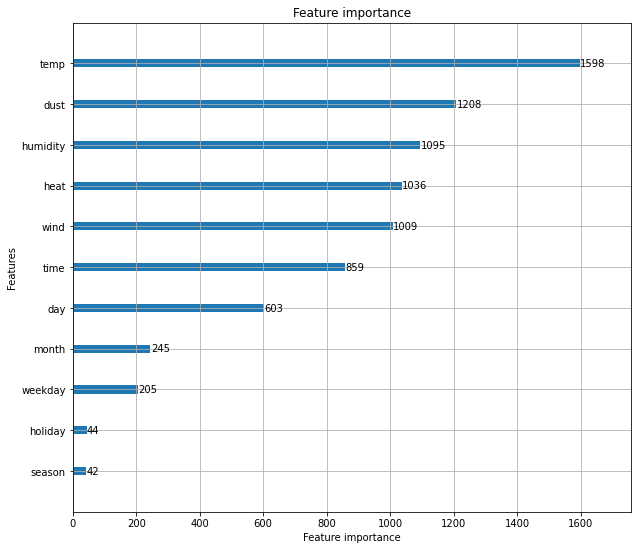

In [17]:
lgbm_bang1_norm=train_predict(bang1_normalized)

## PCA

In [18]:
## PCA with heat & temp
from sklearn.decomposition import PCA

pca=PCA(n_components=1)
heat_temp_pca=pca.fit_transform(bangi_normalized[['heat','temp']])
pca.explained_variance_ratio_

array([0.97895915])

In [19]:
bangi_pca=bangi_normalized.copy()
bangi_pca.drop(['heat','temp'],axis=1,inplace=True)
bangi_pca['heat_temp_pca']=heat_temp_pca

In [20]:
bangi_pca.head()

,month,day,season,time,rainfall,dust,wind,humidity,snow,holiday,weekday,station_num,target,heat_temp_pca
7,1,1,3,0,-0.064305,-0.503561,-0.440241,-1.189104,-0.078714,1,5.0,2620,2,2.820194
8,1,1,3,0,-0.064305,-0.503561,-0.440241,-1.189104,-0.078714,1,5.0,2630,1,2.820194
9,1,1,3,0,-0.064305,-0.503561,-0.440241,-1.189104,-0.078714,1,5.0,4870,2,2.820194
39,1,1,3,1,-0.064305,-0.450350,-0.531777,-1.132034,-0.078714,1,5.0,2620,1,2.866526
40,1,1,3,1,-0.064305,-0.450350,-0.531777,-1.132034,-0.078714,1,5.0,4464,2,2.866526


In [21]:
bang1_pca = bangi_pca[bangi_pca['station_num']==2620].drop(['station_num'],axis = 1)
bang1_pca.head()

,month,day,season,time,rainfall,dust,wind,humidity,snow,holiday,weekday,target,heat_temp_pca
7,1,1,3,0,-0.064305,-0.503561,-0.440241,-1.189104,-0.078714,1,5.0,2,2.820194
39,1,1,3,1,-0.064305,-0.450350,-0.531777,-1.132034,-0.078714,1,5.0,1,2.866526
62,1,1,3,2,-0.064305,-0.450350,-1.080995,-1.074963,-0.078714,1,5.0,2,2.886383
129,1,1,3,6,-0.064305,-0.397140,-0.440241,-0.504259,-0.078714,1,5.0,1,2.906239
171,1,1,3,7,-0.064305,-0.450350,-0.440241,-0.390119,-0.078714,1,5.0,2,2.926096


Train Score | 0.8569505446298233
RMSE | 2.330129690723906
RMSLE | 0.4084881345169257
R2 score | 0.5659254998994236


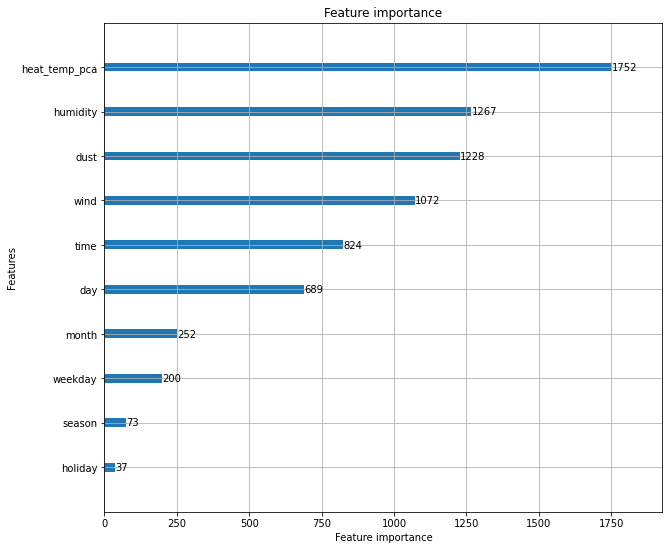

In [22]:
lgbm_bang1_pca, bang1_pred =train_predict(bang1_pca)

In [23]:
bang1_pred

array([2.23465107, 5.15655811, 1.7732261 , ..., 2.85392508, 2.93424395,
       4.23981065])

In [24]:
X_or =bang1.drop(['target'],axis=1)
y_or =bang1['target']
X_or_train,X_or_test,y_or_train,y_or_test=train_test_split(X_or,y_or,test_size=0.2,random_state=121)

In [25]:
X_or_test

,month,day,season,time,rainfall,dust,wind,humidity,snow,temp,holiday,weekday,heat
51539,1,27,3,6,0.0,58.0,1.3,62.0,0.0,-4.3,0,3.0,-0.79
440946,7,23,2,16,0.0,28.0,1.8,47.0,0.0,35.7,0,4.0,35.73
483239,8,11,2,3,0.0,35.0,1.0,79.0,0.0,24.7,0,2.0,29.44
140382,3,11,1,16,0.0,93.0,2.9,45.0,0.0,18.2,0,4.0,10.90
615887,10,7,0,3,0.0,10.0,0.6,86.0,0.0,18.8,0,3.0,19.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
531582,9,2,0,7,0.0,9.0,2.5,78.0,0.0,20.8,0,3.0,23.32
223590,4,19,1,23,0.0,77.0,2.0,73.0,0.0,11.0,0,0.0,11.95
755830,12,4,3,21,0.0,27.0,1.6,46.0,0.0,1.6,1,5.0,1.23
748166,12,1,3,13,0.0,15.0,4.7,40.0,0.0,0.1,0,2.0,-1.00


In [26]:
y_or_test

51539      2
440946     6
483239     1
140382     6
615887     2
          ..
531582    12
223590     4
755830     3
748166     1
568564    10
Name: target, Length: 1415, dtype: int64

In [27]:
bang1_loss = pd.DataFrame(X_or_test)
bang1_loss['y_test'] = y_or_test
bang1_loss['y_pred'] = bang1_pred
bang1_loss['error'] = abs(y_or_test - bang1_pred)
bang1_loss

,month,day,season,time,rainfall,dust,wind,humidity,snow,temp,holiday,weekday,heat,y_test,y_pred,error
51539,1,27,3,6,0.0,58.0,1.3,62.0,0.0,-4.3,0,3.0,-0.79,2,2.234651,0.234651
440946,7,23,2,16,0.0,28.0,1.8,47.0,0.0,35.7,0,4.0,35.73,6,5.156558,0.843442
483239,8,11,2,3,0.0,35.0,1.0,79.0,0.0,24.7,0,2.0,29.44,1,1.773226,0.773226
140382,3,11,1,16,0.0,93.0,2.9,45.0,0.0,18.2,0,4.0,10.90,6,7.271747,1.271747
615887,10,7,0,3,0.0,10.0,0.6,86.0,0.0,18.8,0,3.0,19.53,2,2.755469,0.755469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531582,9,2,0,7,0.0,9.0,2.5,78.0,0.0,20.8,0,3.0,23.32,12,6.420968,5.579032
223590,4,19,1,23,0.0,77.0,2.0,73.0,0.0,11.0,0,0.0,11.95,4,3.187217,0.812783
755830,12,4,3,21,0.0,27.0,1.6,46.0,0.0,1.6,1,5.0,1.23,3,2.853925,0.146075
748166,12,1,3,13,0.0,15.0,4.7,40.0,0.0,0.1,0,2.0,-1.00,1,2.934244,1.934244


In [28]:
s0 = bang1_loss[bang1_loss['season']==0].y_pred
autumn = s0.mean()

s1 = bang1_loss[bang1_loss['season']==1].y_pred
spring = s1.mean()

s2 = bang1_loss[bang1_loss['season']==2].y_pred
summer = s2.mean()

s3 = bang1_loss[bang1_loss['season']==3].y_pred
winter = s3.mean()

season_rental = [spring, summer, autumn, winter]
season_name = ['spring', 'summer', 'autumn', 'winter']

<BarContainer object of 4 artists>

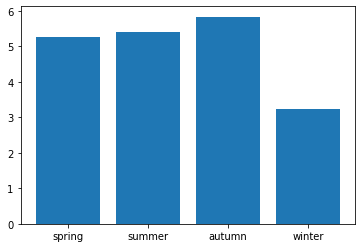

In [29]:
import matplotlib.pyplot as plt

plt.bar(season_name, season_rental)

In [30]:
time = []
for i in range(24):
  t = bang1_loss[bang1_loss['time']==i].y_pred
  time.append(t.mean())

time_name = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

<BarContainer object of 24 artists>

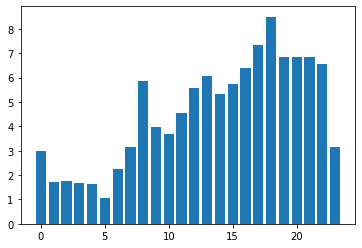

In [31]:
import matplotlib.pyplot as plt

plt.bar(time_name, time)

## 다른 모델

In [32]:
X=bang1_pca.drop(['target'],axis=1)
y=bang1_pca['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=121)

In [33]:
modellist=[LinearRegression(), lm.Ridge(),lm.Lasso(), DecisionTreeRegressor(), RandomForestRegressor(),xgb.XGBRegressor(objective='reg:squarederror'),ExtraTreesRegressor(),lgb.LGBMRegressor()]

for model in modellist:
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(model)
  print("Model R-Square : " ,r2_score(y_test,y_pred))
  print("Model MSE : " ,mean_squared_error(y_test,y_pred))
  print("Model RMSE : " ,np.sqrt(mean_squared_error(y_test,y_pred)))
  print("Model RMSLE : " ,rmsle(y_test,y_pred))

LinearRegression()
Model R-Square :  0.30223568963421876
Model MSE :  8.727797590934022
Model RMSE :  2.9542846157630147
Model RMSLE :  0.5081708099110912
Ridge()
Model R-Square :  0.3022384520652047
Model MSE :  8.727763037807494
Model RMSE :  2.954278767788763
Model RMSLE :  0.5081569371480323
Lasso()
Model R-Square :  0.221776920180504
Model MSE :  9.734194512896865
Model RMSE :  3.1199670692007095
Model RMSLE :  0.5155383427229506
DecisionTreeRegressor()
Model R-Square :  0.21860644185058686
Model MSE :  9.773851590106007
Model RMSE :  3.126315977329548
Model RMSLE :  0.5079253282929628
RandomForestRegressor()
Model R-Square :  0.5758871937855385
Model MSE :  5.304901201413427
Model RMSE :  2.3032371135889216
Model RMSLE :  0.3851479465024881
XGBRegressor(objective='reg:squarederror')
Model R-Square :  0.5406262131470149
Model MSE :  5.745953713413575
Model RMSE :  2.397071904097492
Model RMSLE :  0.39509397582601985
ExtraTreesRegressor()
Model R-Square :  0.5829146790682141
Model 

## 방이동 Top 4

In [34]:
bangi['station_num'].value_counts()

# Because station 2622 is outlier station, we will use station 2620, 1248, 1218, 2621 

2620    7071
2622    6210
1248    6084
1218    5901
2621    5851
2630    5638
1278    5614
1268    5540
1215    5539
2653    5334
4481    5213
1260    5187
4865    5185
4464    4362
1267    4117
4870    3975
1300    3782
1299    3760
2654    3573
4856    3295
4857    2656
4461    2023
1291    1902
2609     980
4892     535
4888     253
Name: station_num, dtype: int64

Station 2620

Train Score | 0.8569505446298233
RMSE | 2.330129690723906
RMSLE | 0.4084881345169257
R2 score | 0.5659254998994236


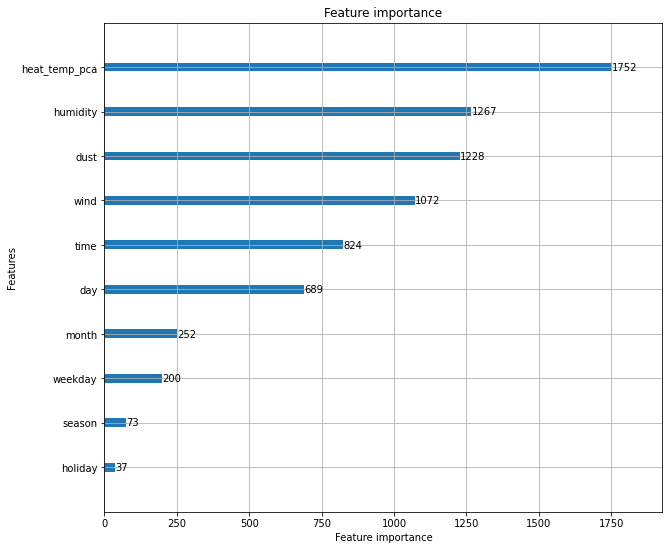

In [35]:
bang2620_pca = bangi_pca[bangi_pca['station_num']==2620 ].drop(['station_num'],axis = 1)
lgbm_bang2620_pca=train_predict(bang2620_pca)

Station 1248

Train Score | 0.7035110813293632
RMSE | 1.779064499601737
RMSLE | 0.39922190448425254
R2 score | 0.37998385696605663


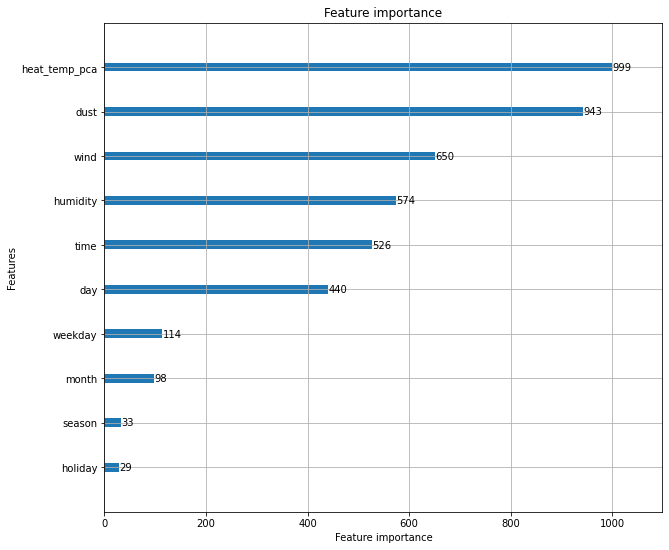

In [36]:
bang1248_pca = bangi_pca[bangi_pca['station_num']==1248].drop(['station_num'],axis = 1)
lgbm_bang1248_pca=train_predict(bang1248_pca)

Station 1218

Train Score | 0.7780147556597115
RMSE | 1.9612063465870446
RMSLE | 0.4033665877837423
R2 score | 0.4233769695630546


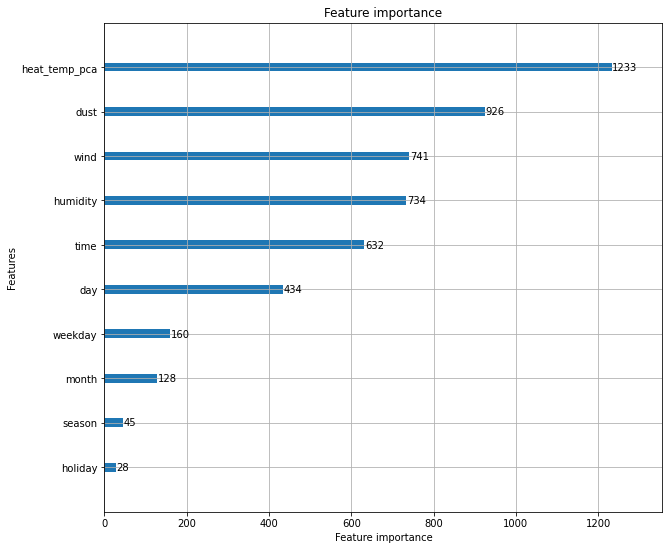

In [37]:
bang1218_pca = bangi_pca[bangi_pca['station_num']==1218].drop(['station_num'],axis = 1)
lgbm_bang1218_pca=train_predict(bang1218_pca)

Station 2621

Train Score | 0.8673364122346323
RMSE | 2.411925278655792
RMSLE | 0.45837511325571334
R2 score | 0.5722477322988655


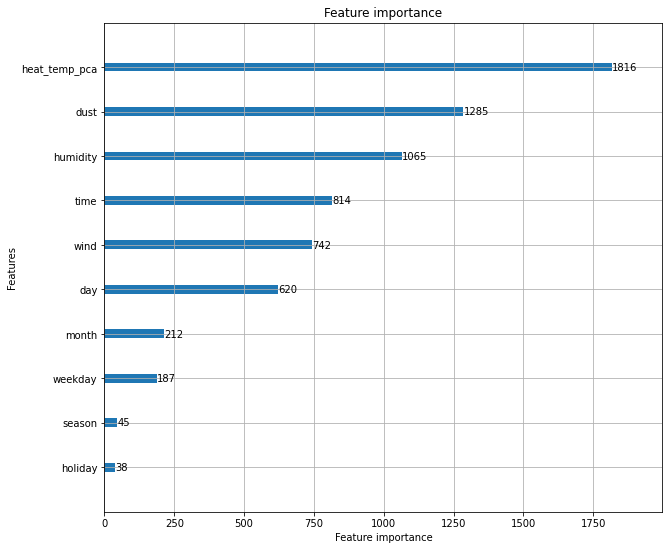

In [38]:
bang2621_pca = bangi_pca[bangi_pca['station_num']==2621].drop(['station_num'],axis = 1)
lgbm_bang2621_pca=train_predict(bang2621_pca)

## 방이동 Outlier 2622

Train Score | 0.9215716924686885
RMSE | 2.9271918528021126
RMSLE | 0.4488359699074489
R2 score | 0.7157459743500116


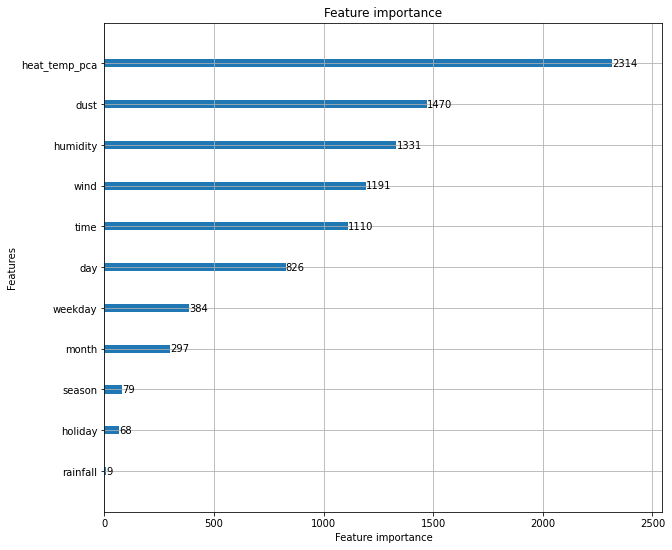

In [39]:
bang2622_pca = bangi_pca[bangi_pca['station_num']==2622].drop(['station_num'],axis = 1)
lgbm_bang2622_pca, predict=train_predict(bang2622_pca)

In [40]:
bang2622_ori = bangi[bangi['station_num']==2622].drop(['station_num'],axis = 1)

X_ori = bang2622_ori.drop(['target'],axis=1)
y_ori = bang2622_ori['target']

X_o_train,X_o_test,y_o_train,y_o_test=train_test_split(X_ori,y_ori,test_size=0.2,random_state=121)

In [41]:
bang2622_loss = pd.DataFrame(X_o_test)
bang2622_loss['y_test'] = y_o_test
bang2622_loss['y_pred'] = predict
bang2622_loss['error'] = abs(y_o_test - predict)
bang2622_loss.sort_values(by = 'error', ascending=False)

,month,day,season,time,rainfall,dust,wind,humidity,snow,temp,holiday,weekday,heat,y_test,y_pred,error
288276,5,19,1,11,0.0,44.0,2.4,49.0,0.0,22.3,1,2.0,19.53,22,11.045215,10.954785
574208,9,19,0,16,0.0,8.0,2.3,51.0,0.0,27.3,1,6.0,23.80,33,22.402650,10.597350
134703,3,9,1,14,0.0,91.0,2.6,37.0,0.0,13.5,0,2.0,7.06,25,14.506661,10.493339
207465,4,11,1,17,0.0,80.0,3.2,29.0,0.0,20.8,1,6.0,14.50,34,23.684735,10.315265
536339,9,3,0,22,0.0,20.0,2.4,57.0,0.0,23.1,0,4.0,24.51,23,13.101574,9.898426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130930,3,8,1,5,0.0,37.0,0.0,47.0,0.0,2.1,0,1.0,5.87,1,0.983005,0.016995
317994,6,2,2,7,0.0,77.0,1.9,90.0,0.0,17.9,0,2.0,23.01,4,4.014735,0.014735
756325,12,5,3,7,0.0,34.0,2.0,61.0,0.0,-2.0,1,6.0,2.80,1,0.988093,0.011907
186792,4,1,1,22,0.0,65.0,6.5,38.0,0.0,16.5,0,3.0,17.54,8,8.007795,0.007795


## 방이동 Outlier 1268

Train Score | 0.9103971714201067
RMSE | 2.694366585456766
RMSLE | 0.48051646464223713
R2 score | 0.6327613521187744


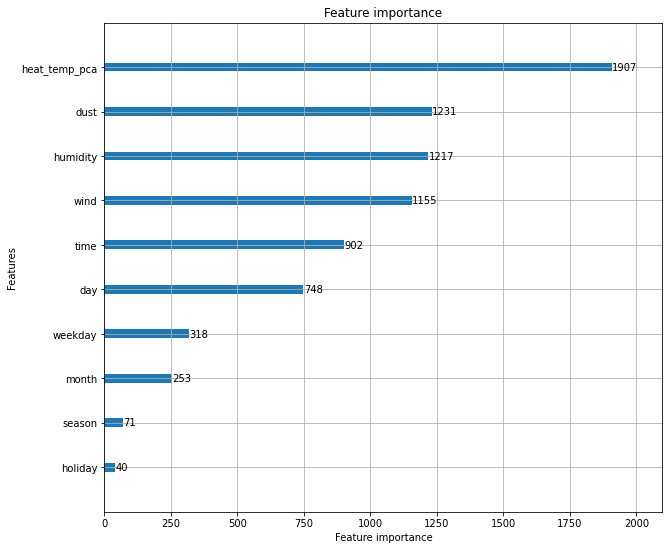

In [42]:
bang1268_pca = bangi_pca[bangi_pca['station_num']==1268].drop(['station_num'],axis = 1)
lgbm_bang1268_pca, predict=train_predict(bang1268_pca)

In [43]:
bang1268_ori = bangi[bangi['station_num']==1268].drop(['station_num'],axis = 1)

X_ori = bang1268_ori.drop(['target'],axis=1)
y_ori = bang1268_ori['target']

X_o_train,X_o_test,y_o_train,y_o_test=train_test_split(X_ori,y_ori,test_size=0.2,random_state=121)

In [44]:
bang1268_loss = pd.DataFrame(X_o_test)
bang1268_loss['y_test'] = y_o_test
bang1268_loss['y_pred'] = predict
bang1268_loss['error'] = abs(y_o_test - predict)
bang1268_loss.sort_values(by = 'error', ascending=False)

,month,day,season,time,rainfall,dust,wind,humidity,snow,temp,holiday,weekday,heat,y_test,y_pred,error
589239,9,25,0,17,0.0,10.0,2.1,69.0,0.0,23.0,1,5.0,21.06,27,14.950863,12.049137
134859,3,9,1,15,0.0,98.0,2.2,36.0,0.0,14.2,0,2.0,7.06,21,9.524978,11.475022
708216,11,13,0,16,0.0,40.0,1.9,58.0,0.0,12.7,1,5.0,6.75,16,4.669848,11.330152
395382,7,3,2,15,0.0,23.0,3.4,70.0,0.0,25.2,1,5.0,23.06,1,12.220365,11.220365
390885,7,1,2,21,0.0,52.0,0.9,69.0,0.0,27.0,0,3.0,26.18,20,9.822723,10.177277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447913,7,26,2,17,0.0,33.0,3.9,43.0,0.0,35.0,0,0.0,34.26,2,2.013161,0.013161
543773,9,7,0,20,0.5,18.0,2.6,99.0,0.0,20.7,0,1.0,19.40,1,1.008392,0.008392
412373,7,11,2,8,0.0,32.0,1.8,92.0,0.0,24.3,1,6.0,25.75,2,2.008174,0.008174
686300,11,4,0,5,0.0,51.0,1.8,90.0,0.0,9.3,0,3.0,12.25,1,0.998538,0.001462


# 잠실동 (Highest station 1222)

In [45]:
jamsil = f5[f5['dong']=='잠실동']
jamsil.head()

,month,day,season,time,rainfall,dust,dong,wind,humidity,snow,...,weekday,heat,station_num,station_name,station_place,place,latitude,longitude,installation_date,target
20,1,1,winter,0,0.0,23.0,잠실동,1.9,41.0,0.0,...,5.0,-4.76,1205,종합운동장역 4번출구,종합운동장역 4번출구,서울특별시 송파구 올림픽로 8,37.510429,127.071373,2017-04-24,3
21,1,1,winter,0,0.0,23.0,잠실동,1.9,41.0,0.0,...,5.0,-4.76,1231,잠실역 6번출구,잠실역 6번출구,서울특별시 송파구 석촌호수로12길 3-5,37.514088,127.099030,2017-06-22,2
22,1,1,winter,0,0.0,23.0,잠실동,1.9,41.0,0.0,...,5.0,-4.76,1235,잠실트리지움310동 옆,잠실트리지움310동 옆,서울특별시 송파구 잠실로 62,37.508873,127.087166,2017-04-24,1
23,1,1,winter,0,0.0,23.0,잠실동,1.9,41.0,0.0,...,5.0,-4.76,1297,석촌호수교차로(동호 팔각정 앞),석촌호수교차로(동호 팔각정 앞),송파구 잠실동 48,37.509201,127.104118,2018-09-07,2
24,1,1,winter,0,0.0,23.0,잠실동,1.9,41.0,0.0,...,5.0,-4.76,2618,삼전역 1번출구,삼전역 1번출구,송파구 잠실동 289,37.504711,127.087563,2018-12-03,2


In [46]:
jamsil.drop(['station_name', 'place', 'station_place', 'latitude', 'longitude','installation_date','dong'], axis = 1, inplace = True)

In [47]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
import pandas as pd
A=jamsil[['season']]
for i in A:
  jamsil[i]=encoder.fit_transform(jamsil[i])

In [48]:
jamsil

,month,day,season,time,rainfall,dust,wind,humidity,snow,temp,holiday,weekday,heat,station_num,target
20,1,1,3,0,0.0,23.0,1.9,41.0,0.0,-8.5,1,5.0,-4.76,1205,3
21,1,1,3,0,0.0,23.0,1.9,41.0,0.0,-8.5,1,5.0,-4.76,1231,2
22,1,1,3,0,0.0,23.0,1.9,41.0,0.0,-8.5,1,5.0,-4.76,1235,1
23,1,1,3,0,0.0,23.0,1.9,41.0,0.0,-8.5,1,5.0,-4.76,1297,2
24,1,1,3,0,0.0,23.0,1.9,41.0,0.0,-8.5,1,5.0,-4.76,2618,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811008,12,31,3,23,0.0,24.0,2.9,38.0,0.0,-7.7,0,4.0,-6.48,1235,1
811009,12,31,3,23,0.0,24.0,2.9,38.0,0.0,-7.7,0,4.0,-6.48,1269,1
811010,12,31,3,23,0.0,24.0,2.9,38.0,0.0,-7.7,0,4.0,-6.48,2646,1
811011,12,31,3,23,0.0,24.0,2.9,38.0,0.0,-7.7,0,4.0,-6.48,1296,1


In [49]:
jamsil['station_num'].value_counts()

1222    6391
1220    6229
2646    6211
1221    6076
2601    5872
1231    5704
2637    5682
2613    5668
1235    5651
2618    5457
1297    5394
1269    5307
2647    5208
2635    5193
1224    5186
4483    5019
1232    4922
1249    4673
1205    4592
1233    4497
1206    4348
4497    3559
1296    3322
2645    3225
4869    2483
4863    2224
4897    1305
4874     865
Name: station_num, dtype: int64

In [50]:
jam1 = jamsil[jamsil['station_num']==1222].drop(['station_num'],axis = 1)
jam1

,month,day,season,time,rainfall,dust,wind,humidity,snow,temp,holiday,weekday,heat,target
68,1,1,3,2,0.0,25.0,1.2,43.0,0.0,-9.5,1,5.0,-4.76,1
190,1,1,3,7,0.0,25.0,1.9,55.0,0.0,-10.1,1,5.0,-4.76,1
527,1,1,3,12,0.0,17.0,1.2,34.0,0.0,-2.3,1,5.0,-4.76,1
617,1,1,3,13,0.0,26.0,1.5,32.0,0.0,-0.1,1,5.0,-4.76,1
728,1,1,3,14,0.0,33.0,2.2,32.0,0.0,1.3,1,5.0,-4.76,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810324,12,31,3,15,0.0,14.0,4.3,28.0,0.0,-4.1,0,4.0,-6.48,4
810434,12,31,3,16,0.0,24.0,3.3,27.0,0.0,-4.0,0,4.0,-6.48,3
810552,12,31,3,17,0.0,23.0,2.4,28.0,0.0,-5.0,0,4.0,-6.48,5
810663,12,31,3,18,0.0,24.0,2.2,32.0,0.0,-5.9,0,4.0,-6.48,8


## Vanilla

Train Score | 0.847220576272497
RMSE | 2.2103545539572216
RMSLE | 0.41133220085567745
R2 score | 0.5225395699355594


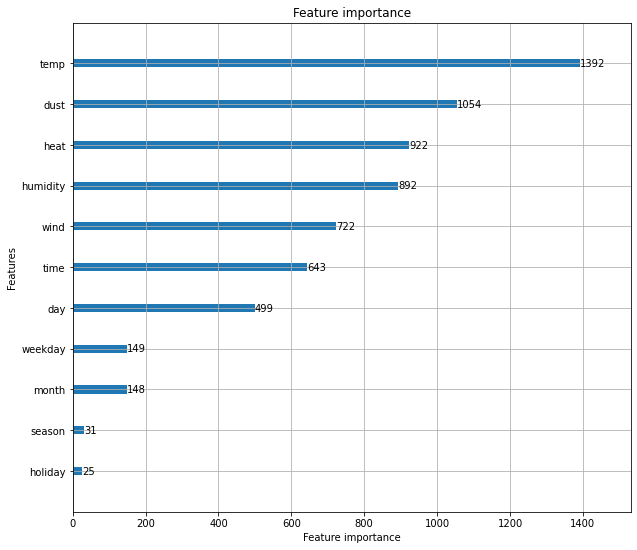

In [51]:
lgbm_jam1=train_predict(jam1)

## Scaling

In [52]:
numerical=['rainfall','dust','wind','humidity','snow','temp','heat',]
categorical=['month','day','time','season','holiday','station_num','weekday']

In [53]:
## Scaling
from sklearn.preprocessing import StandardScaler

jamsil_normalized=jamsil.copy()
scaler=StandardScaler()
jamsil_normalized[numerical]=scaler.fit_transform(jamsil_normalized[numerical])

In [54]:
jamsil_normalized

,month,day,season,time,rainfall,dust,wind,humidity,snow,temp,holiday,weekday,heat,station_num,target
20,1,1,3,0,-0.068421,-0.502302,-0.440989,-1.177651,-0.078997,-2.225812,1,5.0,-1.792894,1205,3
21,1,1,3,0,-0.068421,-0.502302,-0.440989,-1.177651,-0.078997,-2.225812,1,5.0,-1.792894,1231,2
22,1,1,3,0,-0.068421,-0.502302,-0.440989,-1.177651,-0.078997,-2.225812,1,5.0,-1.792894,1235,1
23,1,1,3,0,-0.068421,-0.502302,-0.440989,-1.177651,-0.078997,-2.225812,1,5.0,-1.792894,1297,2
24,1,1,3,0,-0.068421,-0.502302,-0.440989,-1.177651,-0.078997,-2.225812,1,5.0,-1.792894,2618,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811008,12,31,3,23,-0.068421,-0.476128,0.471937,-1.349274,-0.078997,-2.150551,0,4.0,-1.951727,1235,1
811009,12,31,3,23,-0.068421,-0.476128,0.471937,-1.349274,-0.078997,-2.150551,0,4.0,-1.951727,1269,1
811010,12,31,3,23,-0.068421,-0.476128,0.471937,-1.349274,-0.078997,-2.150551,0,4.0,-1.951727,2646,1
811011,12,31,3,23,-0.068421,-0.476128,0.471937,-1.349274,-0.078997,-2.150551,0,4.0,-1.951727,1296,1


In [55]:
jam1_normalized = jamsil_normalized[jamsil_normalized['station_num']==1222].drop(['station_num'],axis = 1)
jam1_normalized.head()

,month,day,season,time,rainfall,dust,wind,humidity,snow,temp,holiday,weekday,heat,target
68,1,1,3,2,-0.068421,-0.449954,-1.080038,-1.063236,-0.078997,-2.319888,1,5.0,-1.792894,1
190,1,1,3,7,-0.068421,-0.449954,-0.440989,-0.376745,-0.078997,-2.376334,1,5.0,-1.792894,1
527,1,1,3,12,-0.068421,-0.659346,-1.080038,-1.578104,-0.078997,-1.642541,1,5.0,-1.792894,1
617,1,1,3,13,-0.068421,-0.423779,-0.806160,-1.692519,-0.078997,-1.435573,1,5.0,-1.792894,1
728,1,1,3,14,-0.068421,-0.240561,-0.167112,-1.692519,-0.078997,-1.303867,1,5.0,-1.792894,1


Train Score | 0.8520843284472829
RMSE | 2.221262014485486
RMSLE | 0.4090083681741987
R2 score | 0.5178156848210771


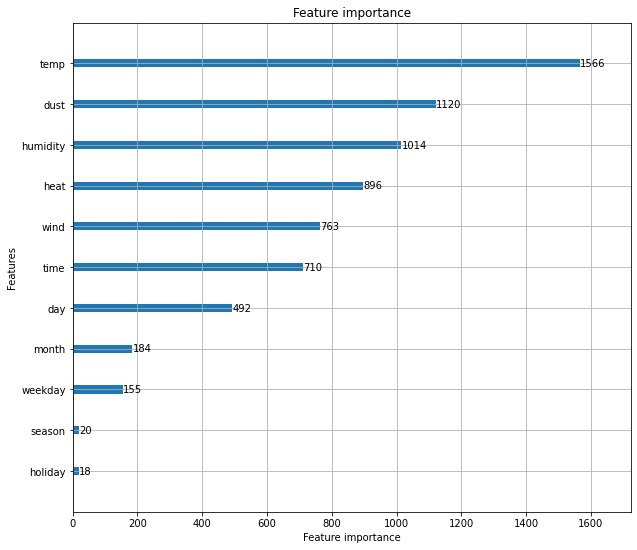

In [56]:
lgbm_jam1_norm=train_predict(jam1_normalized)

## PCA

In [57]:
## PCA with heat & temp
from sklearn.decomposition import PCA

pca=PCA(n_components=1)
heat_temp_pca=pca.fit_transform(jamsil_normalized[['heat','temp']])
pca.explained_variance_ratio_

array([0.9790956])

In [58]:
jamsil_pca=jamsil_normalized.copy()
jamsil_pca.drop(['heat','temp'],axis=1,inplace=True)
jamsil_pca['heat_temp_pca']=heat_temp_pca

In [59]:
jamsil_pca.head()

,month,day,season,time,rainfall,dust,wind,humidity,snow,holiday,weekday,station_num,target,heat_temp_pca
20,1,1,3,0,-0.068421,-0.502302,-0.440989,-1.177651,-0.078997,1,5.0,1205,3,2.841654
21,1,1,3,0,-0.068421,-0.502302,-0.440989,-1.177651,-0.078997,1,5.0,1231,2,2.841654
22,1,1,3,0,-0.068421,-0.502302,-0.440989,-1.177651,-0.078997,1,5.0,1235,1,2.841654
23,1,1,3,0,-0.068421,-0.502302,-0.440989,-1.177651,-0.078997,1,5.0,1297,2,2.841654
24,1,1,3,0,-0.068421,-0.502302,-0.440989,-1.177651,-0.078997,1,5.0,2618,2,2.841654


In [60]:
jam1_pca = jamsil_pca[jamsil_pca['station_num']==1222].drop(['station_num'],axis = 1)
jam1_pca.head()

,month,day,season,time,rainfall,dust,wind,humidity,snow,holiday,weekday,target,heat_temp_pca
68,1,1,3,2,-0.068421,-0.449954,-1.080038,-1.063236,-0.078997,1,5.0,1,2.908176
190,1,1,3,7,-0.068421,-0.449954,-0.440989,-0.376745,-0.078997,1,5.0,1,2.948089
527,1,1,3,12,-0.068421,-0.659346,-1.080038,-1.578104,-0.078997,1,5.0,1,2.429219
617,1,1,3,13,-0.068421,-0.423779,-0.806160,-1.692519,-0.078997,1,5.0,1,2.282871
728,1,1,3,14,-0.068421,-0.240561,-0.167112,-1.692519,-0.078997,1,5.0,1,2.189740


Train Score | 0.8395836447532435
RMSE | 2.2052732527893073
RMSLE | 0.41002790957283
R2 score | 0.5247322784113783


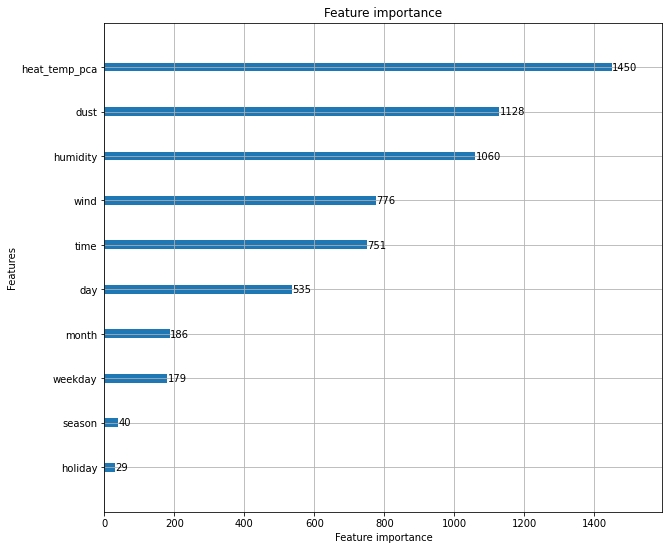

In [61]:
lgbm_jam1_pca=train_predict(jam1_pca)

## 다른 모델

In [62]:
X=jam1_pca.drop(['target'],axis=1)
y=jam1_pca['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=121)

In [63]:
modellist=[LinearRegression(), lm.Ridge(),lm.Lasso(), DecisionTreeRegressor(), RandomForestRegressor(),xgb.XGBRegressor(objective='reg:squarederror'),ExtraTreesRegressor(),lgb.LGBMRegressor()]

for model in modellist:
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(model)
  print("Model R-Square : " ,r2_score(y_test,y_pred))
  print("Model MSE : " ,mean_squared_error(y_test,y_pred))
  print("Model RMSE : " ,np.sqrt(mean_squared_error(y_test,y_pred)))
  print("Model RMSLE : " ,rmsle(y_test,y_pred))

LinearRegression()
Model R-Square :  0.328437543598484
Model MSE :  6.871837948849065
Model RMSE :  2.6214190715810903
Model RMSLE :  0.520931990153886
Ridge()
Model R-Square :  0.3284429680655845
Model MSE :  6.871782442382737
Model RMSE :  2.621408484456922
Model RMSLE :  0.5208403535220357
Lasso()
Model R-Square :  0.2108159642824875
Model MSE :  8.075413915079032
Model RMSE :  2.841727276689132
Model RMSLE :  0.5130072108606849
DecisionTreeRegressor()
Model R-Square :  0.08477628731974807
Model MSE :  9.365129007036748
Model RMSE :  3.0602498275527683
Model RMSLE :  0.5483823788846675
RandomForestRegressor()
Model R-Square :  0.5384807542610559
Model MSE :  4.722547302580141
Model RMSE :  2.1731422646895764
Model RMSLE :  0.4002740409584277
XGBRegressor(objective='reg:squarederror')
Model R-Square :  0.5635133714651879
Model MSE :  4.466398247160762
Model RMSE :  2.1133854942155637
Model RMSLE :  0.3928933348555611
ExtraTreesRegressor()
Model R-Square :  0.5524526092773216
Model MS

## 잠실동 Top4

In [64]:
jamsil['station_num'].value_counts()

# Because station 1222 is outlier station, we use station 1220, 2646, 1221, 2601

1222    6391
1220    6229
2646    6211
1221    6076
2601    5872
1231    5704
2637    5682
2613    5668
1235    5651
2618    5457
1297    5394
1269    5307
2647    5208
2635    5193
1224    5186
4483    5019
1232    4922
1249    4673
1205    4592
1233    4497
1206    4348
4497    3559
1296    3322
2645    3225
4869    2483
4863    2224
4897    1305
4874     865
Name: station_num, dtype: int64

Station 1220

Train Score | 0.7052664809714342
RMSE | 1.7117784863625527
RMSLE | 0.3989716020583538
R2 score | 0.3814589134951961


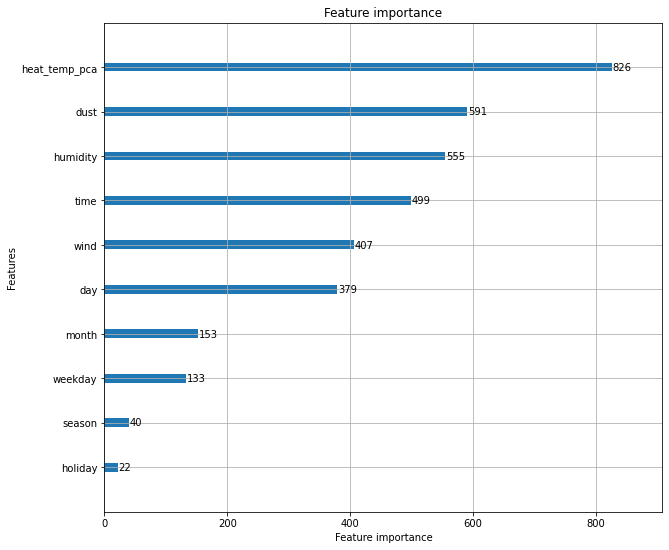

In [65]:
jam1220_pca = jamsil_pca[jamsil_pca['station_num']==1220].drop(['station_num'],axis = 1)
lgbm_jam1220_pca=train_predict(jam1220_pca)

Station 2646

Train Score | 0.7330937742405685
RMSE | 1.87224448217396
RMSLE | 0.40874925335682194
R2 score | 0.3394794076792029


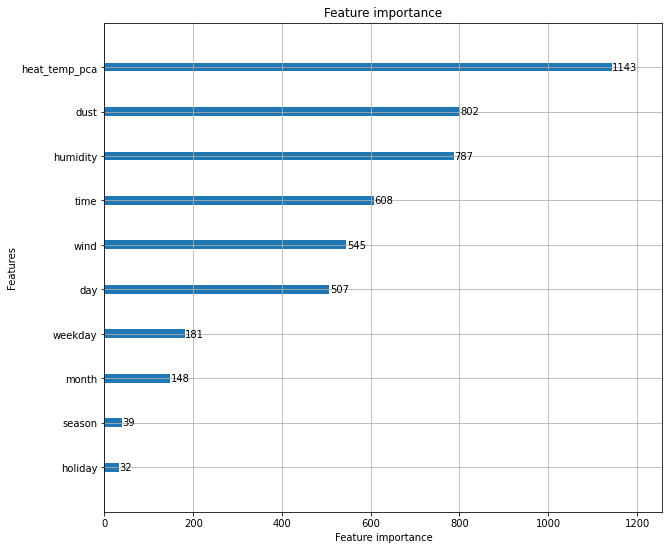

In [66]:
jam2646_pca = jamsil_pca[jamsil_pca['station_num']==2646].drop(['station_num'],axis = 1)
lgbm_jam2646_pca=train_predict(jam2646_pca)

Station 1221

Train Score | 0.7200640765791216
RMSE | 1.7339836190150155
RMSLE | 0.4075097321535114
R2 score | 0.3523491413596178


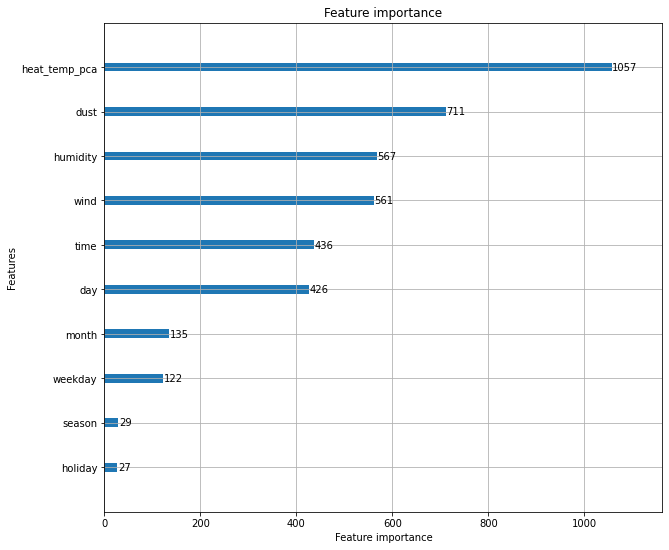

In [67]:
jam1221_pca = jamsil_pca[jamsil_pca['station_num']==1221].drop(['station_num'],axis = 1)
lgbm_jam1221_pca=train_predict(jam1221_pca)

Station 2601

Train Score | 0.7558400413180724
RMSE | 1.7912414719701921
RMSLE | 0.40259956465398544
R2 score | 0.4173770469924487


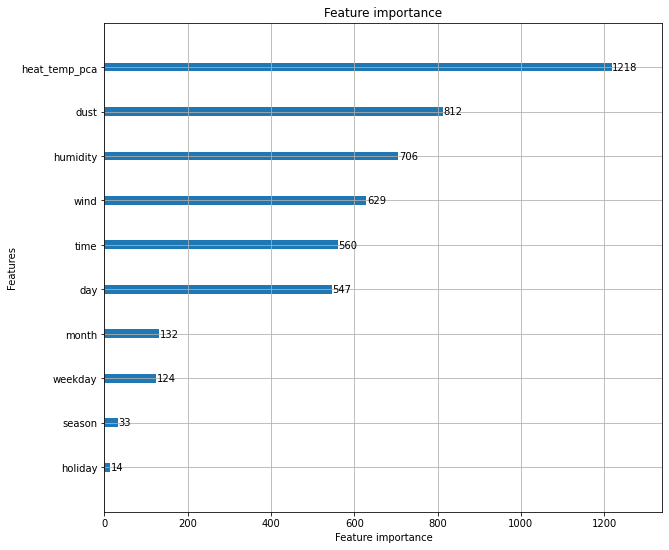

In [68]:
jam2601_pca = jamsil_pca[jamsil_pca['station_num']==2601].drop(['station_num'],axis = 1)
lgbm_jam2601_pca=train_predict(jam2601_pca)

## 잠실동 Outlier 2613

Train Score | 0.8844611871934352
RMSE | 2.104988686813889
RMSLE | 0.419881990044841
R2 score | 0.6408208829606729


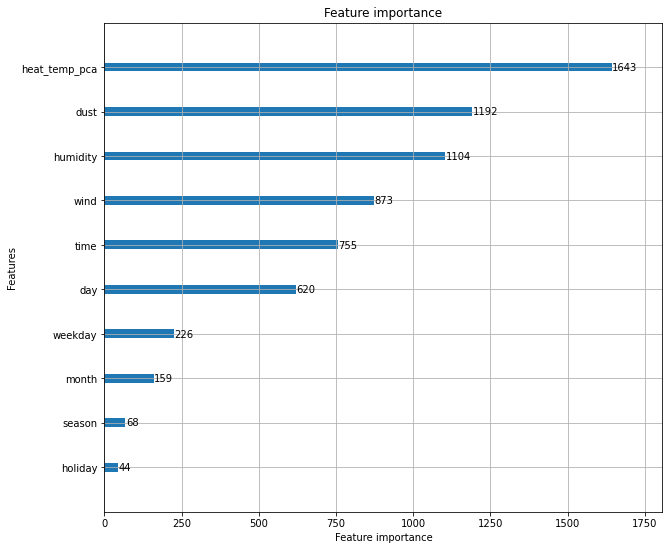

In [69]:
jam2613_pca = jamsil_pca[jamsil_pca['station_num']==2613].drop(['station_num'],axis = 1)
lgbm_jam2613_pca, predict=train_predict(jam2613_pca)

In [70]:
jam2613_ori = jamsil[jamsil['station_num']==2613].drop(['station_num'],axis = 1)

X_ori = jam2613_ori.drop(['target'],axis=1)
y_ori = jam2613_ori['target']

X_o_train,X_o_test,y_o_train,y_o_test=train_test_split(X_ori,y_ori,test_size=0.2,random_state=121)

In [71]:
jam2613_loss = pd.DataFrame(X_o_test)
jam2613_loss['y_test'] = y_o_test
jam2613_loss['y_pred'] = predict
jam2613_loss['error'] = abs(y_o_test - predict)
jam2613_loss.sort_values(by = 'error', ascending=False)

,month,day,season,time,rainfall,dust,wind,humidity,snow,temp,holiday,weekday,heat,y_test,y_pred,error
589461,9,25,0,18,0.0,10.0,2.3,69.0,0.0,22.8,1,5.0,21.06,23,13.442832,9.557168
208045,4,11,1,21,0.0,60.0,1.1,45.0,0.0,16.5,1,6.0,14.50,15,5.519789,9.480211
215152,4,15,1,19,0.0,75.0,3.3,41.0,0.0,14.0,0,3.0,11.32,13,4.440277,8.559723
309118,5,28,1,22,0.0,48.0,2.9,84.0,0.0,15.9,0,4.0,15.08,12,3.557432,8.442568
242731,4,27,1,16,0.0,44.0,4.4,47.0,0.0,18.2,0,1.0,15.30,14,6.964502,7.035498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236402,4,25,1,2,0.0,34.0,2.3,73.0,0.0,14.1,1,6.0,18.08,2,1.981576,0.018424
254549,5,3,1,10,0.0,39.0,2.4,57.0,0.0,14.5,0,0.0,13.93,1,1.013267,0.013267
466887,8,4,2,1,0.0,12.0,0.2,77.0,0.0,27.3,0,2.0,32.88,2,2.011138,0.011138
412504,7,11,2,9,0.0,44.0,0.5,92.0,0.0,24.6,1,6.0,25.75,2,1.997574,0.002426


## 잠실동 Outlier 1222

Train Score | 0.8395836447532435
RMSE | 2.2052732527893073
RMSLE | 0.41002790957283
R2 score | 0.5247322784113783


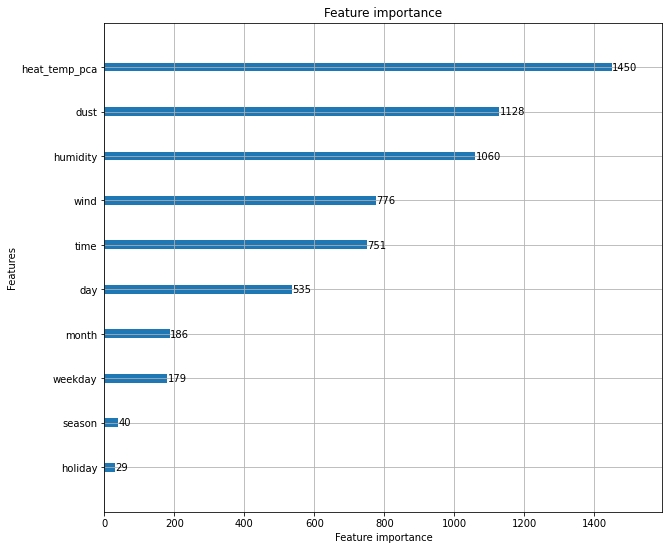

In [72]:
jam1222_pca = jamsil_pca[jamsil_pca['station_num']==1222].drop(['station_num'],axis = 1)
lgbm_jam1222_pca, predict=train_predict(jam1222_pca)

In [73]:
jam1222_ori = jamsil[jamsil['station_num']==1222].drop(['station_num'],axis = 1)

X_ori = jam1222_ori.drop(['target'],axis=1)
y_ori = jam1222_ori['target']

X_o_train,X_o_test,y_o_train,y_o_test=train_test_split(X_ori,y_ori,test_size=0.2,random_state=121)

In [74]:
jam1222_loss = pd.DataFrame(X_o_test)
jam1222_loss['y_test'] = y_o_test
jam1222_loss['y_pred'] = predict
jam1222_loss['error'] = abs(y_o_test - predict)
jam1222_loss.sort_values(by = 'error', ascending=False)

,month,day,season,time,rainfall,dust,wind,humidity,snow,temp,holiday,weekday,heat,y_test,y_pred,error
323228,6,4,2,17,0.0,33.0,4.9,43.0,0.0,22.8,0,4.0,18.13,20,9.047221,10.952779
540578,9,5,0,18,0.0,16.0,3.8,57.0,0.0,25.4,1,6.0,22.96,20,10.933178,9.066822
672319,10,29,0,22,0.0,34.0,1.4,63.0,0.0,13.3,0,4.0,14.50,16,8.321885,7.678115
253408,5,2,1,20,0.0,24.0,2.7,57.0,0.0,13.4,1,6.0,12.21,15,7.474644,7.525356
506584,8,20,2,18,0.0,27.0,2.4,54.0,0.0,29.1,0,4.0,27.88,18,10.690001,7.309999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19221,1,10,3,15,0.0,106.0,2.8,40.0,0.0,4.0,0,0.0,0.34,4,4.025081,0.025081
172853,3,26,1,18,0.0,30.0,3.6,66.0,0.0,14.4,1,5.0,11.82,9,8.975647,0.024353
174201,3,27,1,10,0.0,43.0,3.2,65.0,0.0,9.5,1,6.0,8.34,3,3.018855,0.018855
157136,3,20,1,7,0.0,20.0,1.8,87.0,0.0,4.1,1,6.0,5.39,1,0.989365,0.010635
